In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = 'D:/Data/stocks/'

In [3]:
ind = pd.read_excel('D:/Data/index/000906.SH.xlsx')

In [4]:
comp = pd.read_excel('D:/Data/index-component/000906.SH.xlsx')

In [5]:
dic = {}
for code in comp['wind_code']:
    fname = '%s/%s.xlsx'%(DATA_DIR, code)
    temp = pd.read_excel(fname)
    dic[code] = temp['close']
df = pd.DataFrame(dic)

In [9]:
df.head()

,000001.SZ,000002.SZ,000006.SZ,000008.SZ,000009.SZ,000012.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,...,603799.SH,603806.SH,603816.SH,603858.SH,603866.SH,603868.SH,603877.SH,603883.SH,603888.SH,603993.SH
2010-01-04,8.007994,8.554429,3.690046,1.410065,5.714523,8.244930,8.096568,11.19,6.250165,26.625225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.869518,8.360744,3.583858,1.410065,5.566916,8.104753,8.281986,11.21,6.245505,27.349787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.734419,8.360744,3.593813,1.410065,5.561644,8.355372,8.226360,11.32,6.236183,27.774863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.649982,8.296182,3.563947,1.410065,5.667078,7.913603,8.331430,11.05,6.096358,26.547938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.633094,8.352674,3.650225,1.410065,5.941206,7.828648,8.319069,11.14,6.166271,26.035915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mon_ret = df.pct_change().resample('M').last()

In [11]:
M = 12
E = np.ones(M)
corr = pd.Series(index=mon_ret.index)
for date in mon_ret.index:
    R = mon_ret[mon_ret.index <= date].iloc[-M:]
    if R.shape[0] == M:
        x = np.dot(R.T, E)
        y = np.dot(E, R)
        C = np.dot(R.T, R) - 1./M * np.dot(x.reshape(-1, 1), y.reshape(-1, 1).T)
        C = 1. / (M-1) * C
        d = np.diag(C)
        stddev = np.sqrt(d.real)
        C /= stddev[:, None]
        C /= stddev[None, :]
        corr.loc[date] = np.nanmean(C)

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


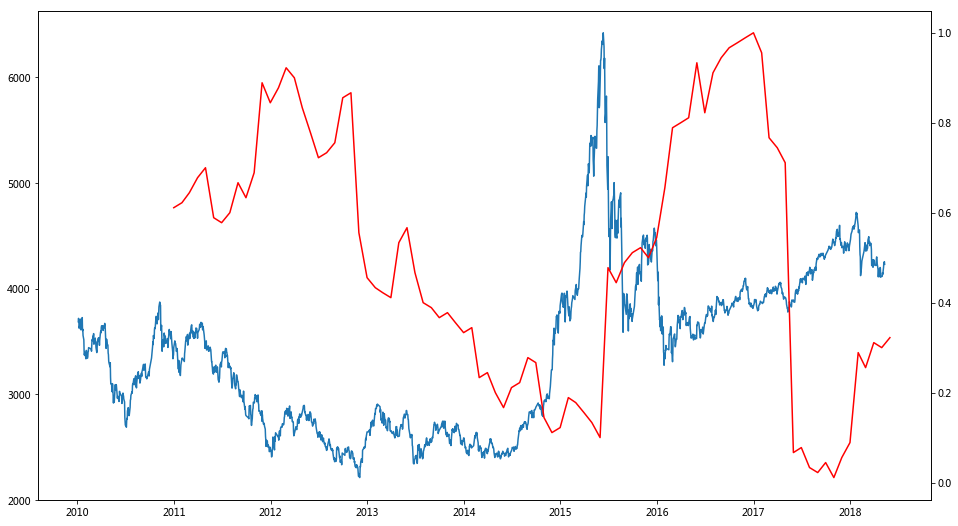

In [15]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ind[ind.index >= '2010-01-01']['close'])
ax2 = ax1.twinx()
ax2.plot(corr.rank(pct=True), color='red')

In [16]:
corr.tail(n=40)

2015-02-28    0.114414
2015-03-31    0.105480
2015-04-30    0.101865
2015-05-31    0.088618
2015-06-30    0.294052
2015-07-31    0.289652
2015-08-31    0.307175
2015-09-30    0.309130
2015-10-31    0.309353
2015-11-30    0.308701
2015-12-31    0.315645
2016-01-31    0.364285
2016-02-29    0.440505
2016-03-31    0.448391
2016-04-30    0.465477
2016-05-31    0.533765
2016-06-30    0.472331
2016-07-31    0.496102
2016-08-31    0.538031
2016-09-30    0.549825
2016-10-31    0.562386
2016-11-30    0.587183
2016-12-31    0.588405
2017-01-31    0.538253
2017-02-28    0.434412
2017-03-31    0.432963
2017-04-30    0.426248
2017-05-31    0.075462
2017-06-30    0.075964
2017-07-31    0.058698
2017-08-31    0.058314
2017-09-30    0.059688
2017-10-31    0.056022
2017-11-30    0.075376
2017-12-31    0.078468
2018-01-31    0.154266
2018-02-28    0.148132
2018-03-31    0.157840
2018-04-30    0.155011
2018-05-31    0.163436
Freq: M, dtype: float64

In [12]:
corr.to_csv('../data/correlation.csv')

In [17]:
df = pd.read_excel('D:/Data/risk/correlation.xlsx', index_col=0)

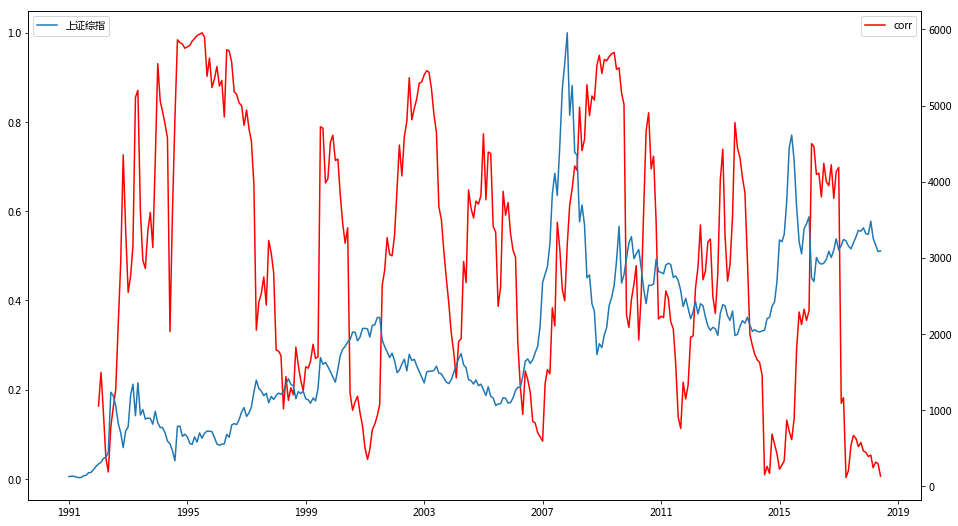

In [19]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['correlation'].dropna().rank(pct=True), color='red', label=u'corr')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(df['close'].resample('M').last(), label=u'上证综指')
ax2.legend(loc='upper left')
# df['close'].resample('M').last().plot(color='red')

In [6]:
df['correlation']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
6759        NaN
6760        NaN
6761        NaN
6762        NaN
6763        NaN
6764        NaN
6765        NaN
6766        NaN
6767        NaN
6768        NaN
6769        NaN
6770        NaN
6771        NaN
6772        NaN
6773        NaN
6774        NaN
6775        NaN
6776        NaN
6777        NaN
6778        NaN
6779        NaN
6780        NaN
6781    0.17670
6782        NaN
6783        NaN
6784        NaN
6785        NaN
6786        NaN
6787        NaN
6788    0.17385
Name: correlation, Lengt